##Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

## Reading the dataset

In [2]:
# Load the CSV file into a DataFrame
data_spam = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Display the DataFrame
data_spam


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


##Visualizing the first five rows

In [3]:
data_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data_spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


##Dropping the columns that are not required

In [7]:
data = data_spam.drop(columns=data_spam.columns[2:5])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.columns = ['Category', 'Message']
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Now to check for null values

In [13]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

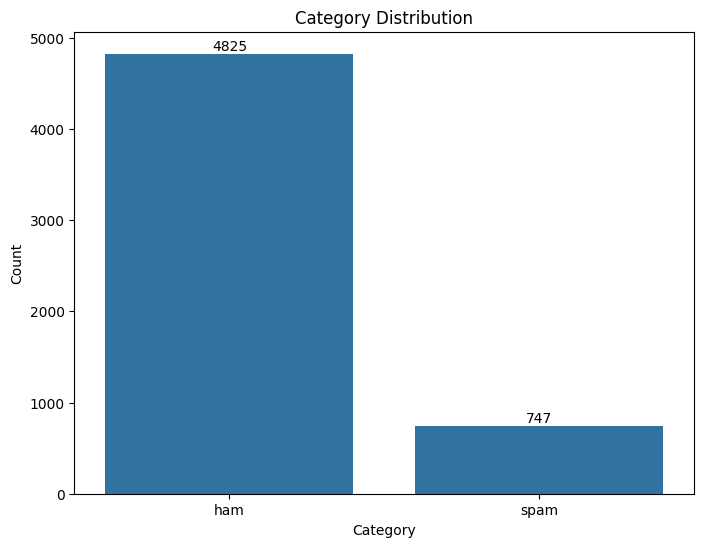

In [16]:
# Create a DataFrame to count the occurrences of each category
category_counts = data['Category'].value_counts().reset_index()

# Rename the columns of the DataFrame
category_counts.columns = ['Category', 'Count']

# Create a bar plot to visualize the category distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

# Add text labels to the bars
for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


In [18]:
# Create a new column 'spam' based on the 'Category' column
data_spam['spam'] = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Display the DataFrame with the new column
data_spam


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0


## Training and testing the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.Message,data_spam.spam, test_size=0.2)

In [21]:
# Import the CountVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
count_vectorizer = CountVectorizer()

# Transform the training data into a matrix of token counts
X_train_count = count_vectorizer.fit_transform(X_train.values)

# Display the shape of the resulting matrix
X_train_count.shape


(4457, 7811)

In [22]:
X_train_count

<4457x7811 sparse matrix of type '<class 'numpy.int64'>'
	with 59364 stored elements in Compressed Sparse Row format>

##Now we apply the Naive Bayes Method

In [23]:
# Import the MultinomialNB class from the sklearn.naive_bayes module
from sklearn.naive_bayes import MultinomialNB

# Create an instance of MultinomialNB
multinomial_nb = MultinomialNB()

# Fit the model using the training data and labels
multinomial_nb.fit(X_train_count, y_train)

# Display the model
multinomial_nb


MultinomialNB()

In [28]:
# Transform the test data using the same CountVectorizer instance
X_test_count = count_vectorizer.transform(X_test.values)

# Calculate the accuracy score of the model on the test data
accuracy = multinomial_nb.score(X_test_count, y_test)

# Display the accuracy score
accuracy


0.9874439461883409

In [29]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [30]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [31]:
clf.score(X_test,y_test)


0.9874439461883409

## Now we design a pre_build model to detect spam and not spam message

In [34]:
# Pre-trained model
pretrained_model = multinomial_nb
new_sentences = [
    "Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML"
]

new_sentences_count = count_vectorizer.transform(new_sentences)
# Predict whether each sentence is spam (1) or not (0)
predictions = pretrained_model.predict(new_sentences_count)

for sentence, prediction in zip(new_sentences, predictions):
    if prediction == 1:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")


'Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX" to 85069 to verify. Get Usher and Britney. FML' is a spam message.
